<a href="https://colab.research.google.com/github/imemmul/GenerativeNFT/blob/pix2pix/stable_diffusion_fineTune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch==2.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 107.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
import torch
torch.__version__

'2.0.1+cu117'

In [4]:
!pip install --upgrade huggingface_hub

  Using cached huggingface_hub-0.18.0-py3-none-any.whl (301 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tokenizers 0.14.1 requires huggingface_hub<0.18,>=0.16.4, but you have huggingface-hub 0.18.0 which is incompatible.


In [5]:
!pip install git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-rltafn8y
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-rltafn8y
  Resolved https://github.com/huggingface/diffusers.git to commit bc7a4d4917456afd70913be85bd25c556c25862c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [6]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install .

fatal: destination path 'diffusers' already exists and is not an empty directory.
/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.22.0.dev0-py3-none-any.whl size=1577476 sha256=d3afa7be6c334210e661c2a33b5273d064a667eacca523aab4ecd78c2b00bf3b
  Stored in directory: /tmp/pip-ephem-wheel-cache-_zk1za2p/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.22.0.dev0
    Uninstalling diffusers-0.22.0.dev0:
      Successfully uninstalled diffusers-0.22.0.dev0


In [7]:
!pip install accelerate>=0.16.0
!pip install torchvision
!pip install transformers>=4.25.1
!pip install datasets
!pip install ftfy
!pip install tensorboard
!pip install Jinja2

  Using cached torch-2.1.0-cp310-cp310-manylinux1_x86_64.whl (670.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.0.0
    Uninstalling triton-2.0.0:
      Successfully uninstalled triton-2.0.0
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1


In [8]:
!python3 -m pip install --upgrade tensorrt

In [9]:
!nvidia-smi

Sat Oct 21 18:49:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
!accelerate config

----------------------------------------------------------------------------------------------------In which compute environment are you running?
Please input a choice index (starting from 0), and press enter
 ➔  This machine
    AWS (Amazon SageMaker)
0
This machine
----------------------------------------------------------------------------------------------------Which type of machine are you using?
Please input a choice index (starting from 0), and press enter
 ➔  No distributed training
    multi-CPU
    multi-XPU
    multi-GPU
    multi-NPU
    TPU
0
No distributed training
Do you want to run your training on CPU only (even if a GPU / Apple Silicon / Ascend NPU device is available)? [yes/NO]:NO
Do you wish to optimize your script with torch dynamo?[yes/NO]:NO
Do you want to use DeepSpeed? [yes/NO]: NO
What GPU(s) (by id) should be used for training on this machine as a comma-seperated list? [all]:0
-----------------------------------------------------------------------------------

In [11]:
import tensorrt
print(tensorrt.__version__)
assert tensorrt.Builder(tensorrt.Logger())

8.6.1


In [12]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root

In [13]:
!pwd

/content/diffusers


In [14]:
%cd '/content/diffusers/examples'
!ls

/content/diffusers/examples
community	  inference		  research_projects  unconditional_image_generation
conftest.py	  instruct_pix2pix	  t2i_adapter	     wuerstchen
controlnet	  kandinsky2_2		  test_examples.py
custom_diffusion  README.md		  text_to_image
dreambooth	  reinforcement_learning  textual_inversion


In [15]:
%cd '/content/diffusers/examples/text_to_image'
!ls

/content/diffusers/examples/text_to_image
diffusers	       requirements_sdxl.txt	    train_text_to_image_lora.py
README.md	       requirements.txt		    train_text_to_image_lora_sdxl.py
README_sdxl.md	       sd-pokemon-model		    train_text_to_image.py
requirements_flax.txt  train_text_to_image_flax.py  train_text_to_image_sdxl.py


In [16]:
!pip show diffusers

Name: diffusers
Version: 0.22.0.dev0
Summary: State-of-the-art diffusion in PyTorch and JAX.
Home-page: https://github.com/huggingface/diffusers
Author: The HuggingFace team
Author-email: patrick@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, importlib-metadata, numpy, Pillow, regex, requests, safetensors
Required-by: 


In [62]:
!pip install --upgrade diffusers transformers scipy

In [17]:
!pip install --upgrade diffusers

In [65]:
# !pip show tensorrt

In [67]:
# !find / -name libnvinfer.so* 2>/dev/null

In [68]:
import os

# os.environ["TENSORRT_HOME"] = "/usr/local/lib/python3.10/dist-packages/tensorrt_libs/libnvinfer.so.8"

In [69]:
!echo $TENSORRT_HOME

In [70]:
# !find / -name libnvinfer.so.8 2>/dev/null

In [71]:
# os.environ["LD_LIBRARY_PATH"] = "/usr/local/lib/python3.10/dist-packages/tensorrt_libs/libnvinfer.so.8"

In [72]:
!echo $LD_LIBRARY_PATH

/usr/lib64-nvidia:/usr/local/lib/python3.10/dist-packages/tensorrt_libs:/usr/lib64-nvidia:/usr/local/lib/python3.10/dist-packages/tensorrt_libs:/usr/lib64-nvidia


In [1]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

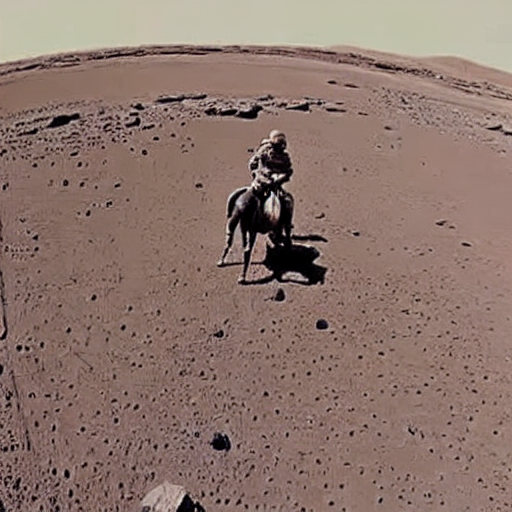

In [2]:
from IPython.display import Image
Image(filename="astronaut_rides_horse.png")

In [3]:
!ls /content/diffusers

'=0.16.0'       CODE_OF_CONDUCT.md   examples	   PHILOSOPHY.md    setup.cfg   _typos.toml
'=4.25.1'       CONTRIBUTING.md      LICENSE	   pyproject.toml   setup.py    utils
 build	        docker		     Makefile	   README.md	    src
 CITATION.cff   docs		     MANIFEST.in   scripts	    tests


In [18]:
%cd '/content/diffusers/examples/text_to_image'

/content/diffusers/examples/text_to_image


In [5]:
!ls

diffusers	       requirements_sdxl.txt	    train_text_to_image_lora.py
README.md	       requirements.txt		    train_text_to_image_lora_sdxl.py
README_sdxl.md	       sd-pokemon-model		    train_text_to_image.py
requirements_flax.txt  train_text_to_image_flax.py  train_text_to_image_sdxl.py


In [19]:
import torch
torch.cuda.is_available()

True

In [20]:
!echo $LD_LIBRARY_PATH

/usr/lib64-nvidia


In [21]:
!find / -name "libnvinfer.so.*"

find: ‘/proc/56/task/56/net’: Invalid argument
find: ‘/proc/56/net’: Invalid argument
find: ‘/proc/21813’: No such file or directory
/usr/local/lib/python3.10/dist-packages/tensorrt_libs/libnvinfer.so.8


In [22]:
import os


tensorrt_path = "/usr/local/lib/python3.10/dist-packages/tensorrt_libs"
os.environ["LD_LIBRARY_PATH"] = f"/usr/lib64-nvidia:{tensorrt_path}:" + os.environ.get("LD_LIBRARY_PATH", "")


In [23]:
!nvidia-smi

Sat Oct 21 18:51:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    30W /  70W |    173MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
!pip install evaluate
!pip install datasets==2.3.2

In [27]:
import torchvision

In [25]:
!export dataset_name="lambdalabs/pokemon-blip-captions"

!accelerate launch train_text_to_image.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4" \
  --dataset_name="lambdalabs/pokemon-blip-captions"\
  --use_ema \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=15000 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --lr_scheduler="constant" --lr_warmup_steps=0 \
  --output_dir="sd-pokemon-model"

10/21/2023 18:51:38 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'sample_max_value', 'prediction_type', 'thresholding', 'dynamic_thresholding_ratio', 'timestep_spacing', 'variance_type', 'clip_sample_range'} was not found in config. Values will be initialized to default values.
{'force_upcast', 'norm_num_groups'} was not found in config. Values will be initialized to default values.
{'dual_cross_attention', 'time_embedding_dim', 'addition_embed_type_num_heads', 'attention_type', 'only_cross_attention', 'encoder_hid_dim', 'use_linear_projection', 'addition_embed_type', 'num_class_embeds', 'timestep_post_act', 'addition_time_embed_dim', 'time_cond_proj_dim', 'transformer_layers_per_block', 'reverse_transformer_layers_per_block', 'dropout', 'time_embedding_type', 'class_embeddings_concat', 'encoder_hid_dim_type', 'upcast_attention', 'num_attention_heads', 'conv_out_kernel', 'resnet_time_

In [26]:
torch.__version__

'2.0.1+cu117'